# Examining results of fake data
Performing some similar data analysis that I did earlier, but on the fake data now

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction import text
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
fake_reviews_df = pd.read_pickle('ign_data/fake_data_01.pkl')
fake_reviews_df.head()

,review,review_text,scores
Alpha Protocol Review0,Alpha Protocol Review,"Alpha Protocol Review #1, #3 and #5. Another d...",7.5
Alpha Protocol Review1,Alpha Protocol Review,\nAlpha Protocol Review Path: Working Selectio...,6.9
Alpha Protocol Review2,Alpha Protocol Review,\nAlpha Protocol Review: Pentacle X3500/3550 M...,5.8
Alpha Protocol Review3,Alpha Protocol Review,\nAlpha Protocol Review Papers 2016-09-01 [Arc...,6.9
Alpha Protocol Review4,Alpha Protocol Review,\nAlpha Protocol Review\n\nWho voted on it? In...,6.1


In [6]:
def num_words(text):
    
    number = len(text.split(' '))
    
    return number

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

fake_reviews_df['polarity'] = fake_reviews_df['review_text'].apply(pol)
fake_reviews_df['subjectivity'] = fake_reviews_df['review_text'].apply(sub)
fake_reviews_df['number_words_review'] = pd.DataFrame(fake_reviews_df.review_text.apply(num_words))
fake_reviews_df.head()

,review,review_text,scores,polarity,subjectivity,number_words_review
Alpha Protocol Review0,Alpha Protocol Review,"Alpha Protocol Review #1, #3 and #5. Another d...",7.5,0.092329,0.430167,716
Alpha Protocol Review1,Alpha Protocol Review,\nAlpha Protocol Review Path: Working Selectio...,6.9,0.108730,0.416138,499
Alpha Protocol Review2,Alpha Protocol Review,\nAlpha Protocol Review: Pentacle X3500/3550 M...,5.8,0.020894,0.481667,737
Alpha Protocol Review3,Alpha Protocol Review,\nAlpha Protocol Review Papers 2016-09-01 [Arc...,6.9,0.037469,0.366875,593
Alpha Protocol Review4,Alpha Protocol Review,\nAlpha Protocol Review\n\nWho voted on it? In...,6.1,0.086142,0.567547,737


# Now for plotting similar data to my previous analysis

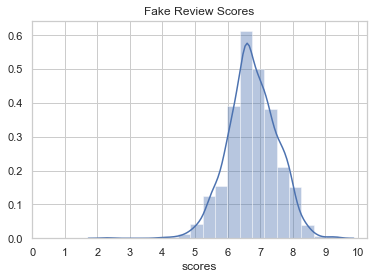

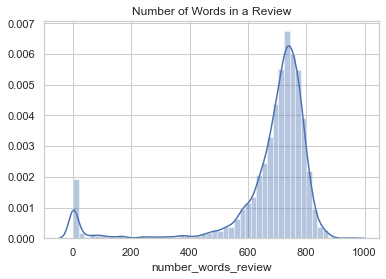

In [9]:
sns.set(style='whitegrid')
photo_dir = 'project_notes_or_data/photos_for_presentation/'
# sns.violinplot(ign_filtered_df['review_score_float'])
sns.distplot(fake_reviews_df['scores'], bins=19, hist=True)
plt.xticks(np.arange(0,11,1))
plt.title('Fake Review Scores')
plt.savefig(photo_dir+'fake_review_scores_hist.jpg', dpi=200)
plt.show()

sns.distplot(fake_reviews_df['number_words_review'])
plt.title('Number of Words in a Review')
plt.savefig(photo_dir+'fake_words_per_review_hist.jpg', dpi=200)
plt.show()

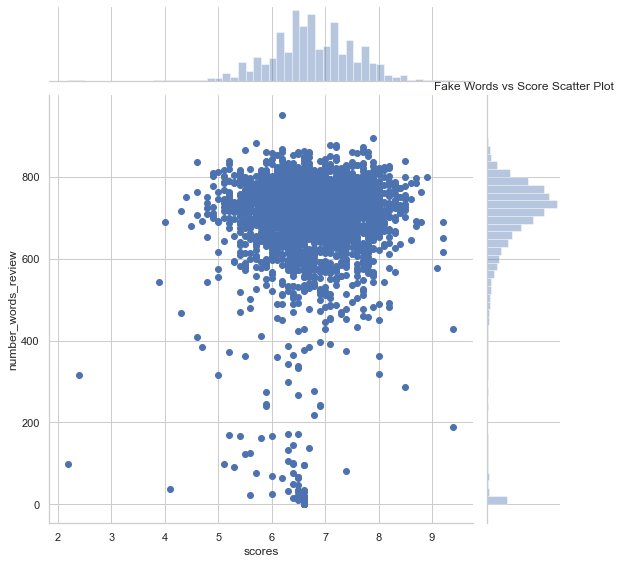

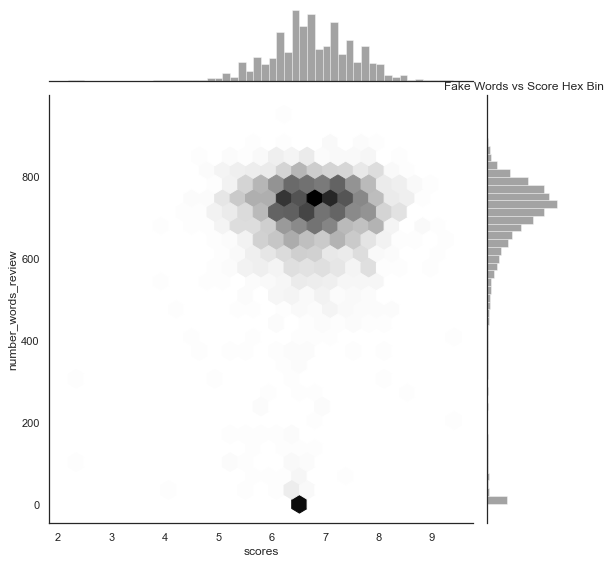

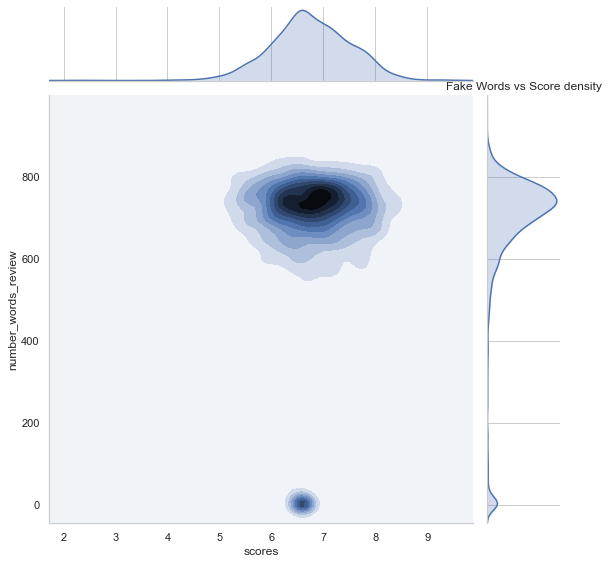

correlation =  0.0833192724313009


In [11]:
height = 8
sns.jointplot(y='number_words_review', x='scores', data=fake_reviews_df, height=height)
plt.title('Fake Words vs Score Scatter Plot')
plt.savefig(photo_dir+'fake_words_vs_score_scatter.jpg', dpi=200)
plt.show()


with sns.axes_style('white'):
    sns.jointplot(y='number_words_review', x='scores', data=fake_reviews_df, 
                  kind='hex', color='k', height=height, gridsize=25)
plt.title('Fake Words vs Score Hex Bin')
plt.savefig(photo_dir+'fake_words_vs_score_hex.jpg', dpi=200)
plt.show()


sns.jointplot(y='number_words_review', x='scores', 
              data=fake_reviews_df, kind='kde', height=height)
plt.title('Fake Words vs Score density')
plt.savefig(photo_dir+'fake_words_vs_score_heat.jpg', dpi=200)
plt.show()


# calculate correlation
col1 = fake_reviews_df['scores']
col2 = fake_reviews_df['number_words_review']
score_word_corr = col1.corr(col2)
print('correlation = ', score_word_corr)

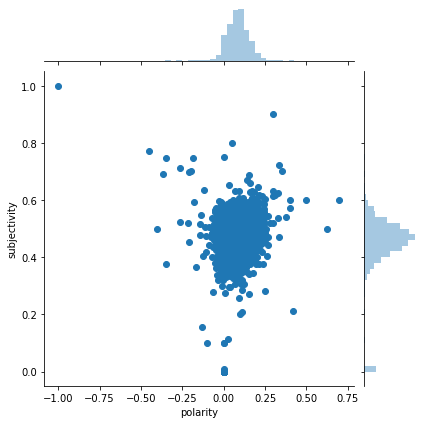

In [7]:
sns.jointplot(x='polarity', y='subjectivity', data=fake_reviews_df)
plt.savefig(photo_dir+'fake_polarity_subjectivity_scatter.jpg', dpi=200)
plt.show()